In [1]:
%load_ext autoreload
%autoreload 2
import pickle, json
from enterprise_extensions.models import model_2a
from enterprise.signals.parameter import sample as sample_params
import numpy as np
from impulse.impulse import sample
import matplotlib.pyplot as plt
from emcee.autocorr import integrated_time

In [2]:
with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/psrs.pkl', 'rb') as f:
    psrs = pickle.load(f)

with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/channelized_12p5yr_v3_full_noisedict.json', 'r') as f:
    params = json.load(f)

In [3]:
pta = model_2a([psrs[0]], noisedict=params, gamma_common=4.33, n_gwbfreqs=5, tm_marg=True, tnequad=True, tm_svd=True)

In [4]:
x0 = np.array(list(sample_params(pta.params).values()))

In [7]:
chain = sample(pta.get_lnlikelihood, pta.get_lnprior, len(pta.params), x0, num_samples=1_000_000)

ValueError: shape mismatch: value array of shape (3,3) could not be broadcast to indexing result of shape (3,1)

In [7]:
import corner

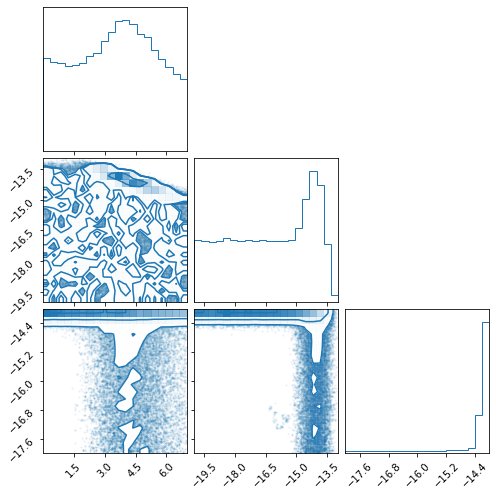

In [8]:
thing = corner.corner(chain[::10, :3], hist2d_kwargs={"density":True}, color='C0', kwargs={"density":True})
plt.show()

In [9]:
from PTMCMCSampler.PTMCMCSampler import PTSampler as ptmcmc

Do not have acor package


In [10]:
ndim = len(x0)
cov = np.diag(np.ones(ndim) * 0.01**2)

outDir = './chains/sngl/'

sampler = ptmcmc(ndim, pta.get_lnlikelihood, pta.get_lnprior, cov,
                 outDir=outDir, resume=False)

In [11]:
N = int(1e6)
x0 = np.hstack([p.sample() for p in pta.params])
sampler.sample(x0, N, SCAMweight=30, AMweight=15, DEweight=50, )

Finished 0.10 percent in 0.253279 s Acceptance rate = 0.974

/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))


Finished 1.00 percent in 2.125595 s Acceptance rate = 0.359156Adding DE jump with weight 50
Finished 99.90 percent in 177.621065 s Acceptance rate = 0.211474
Run Complete


In [12]:
with open(outDir + 'chain_1.txt', 'r') as f:
    chain2 = np.loadtxt(f)

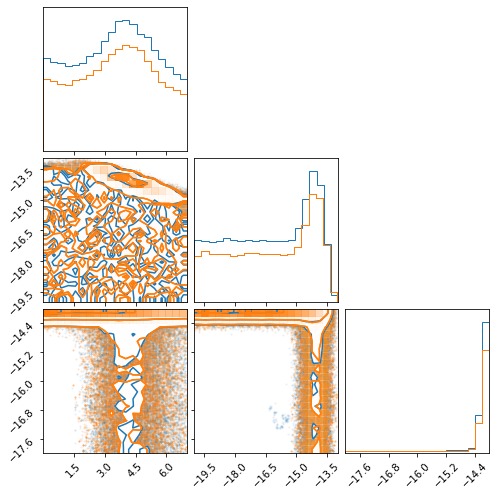

In [23]:
corner.corner(chain2[20_000:, :3], hist2d_kwargs={'density':True}, fig=thing, color='C1', kwargs={"density":True})

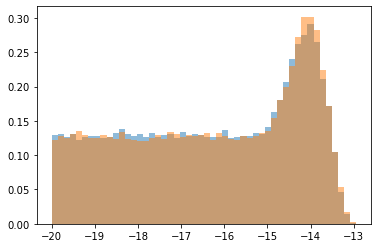

In [22]:
ii = 1
__, bins, __ = plt.hist(chain[:, ii], bins=50, density=True, alpha=0.5)
plt.hist(chain2[:, ii], bins=bins, density=True, alpha=0.5)
plt.show()

In [27]:
ii = 2
print(integrated_time(chain2[:, ii]))
print(integrated_time(chain[:, ii]))

[23.87387451]
[338.37750864]
